In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

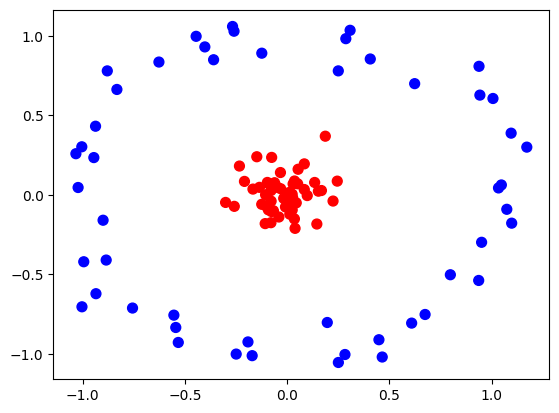

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


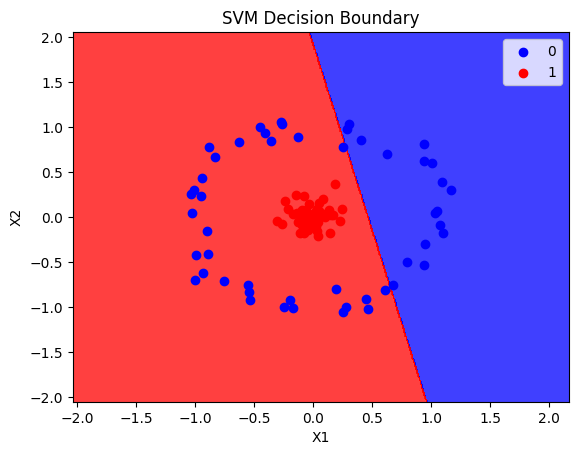

In [7]:
plot_decision_boundary(X, y, classifier)

In [8]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

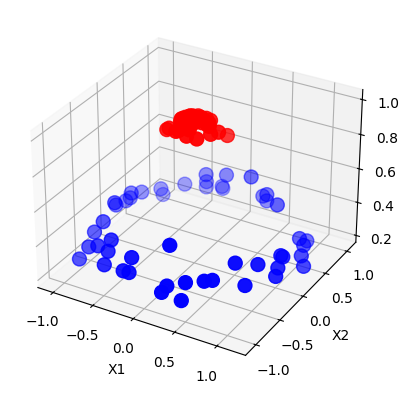

In [9]:
plot_3d_plot(X,y)

In [10]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


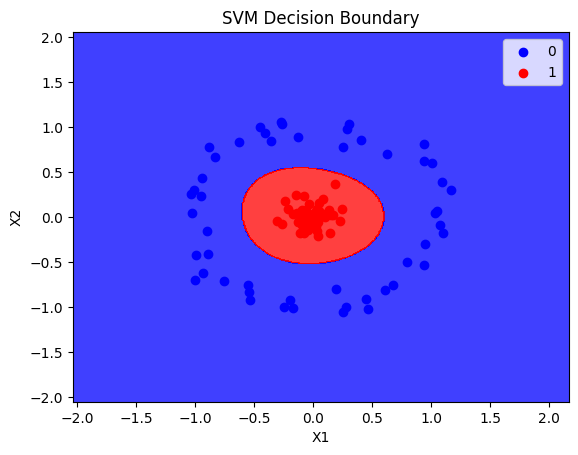

In [12]:
plot_decision_boundary(X, y, rbf_classifier)

In [13]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Admin\AppData\Local\Temp\ipykernel_21724\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


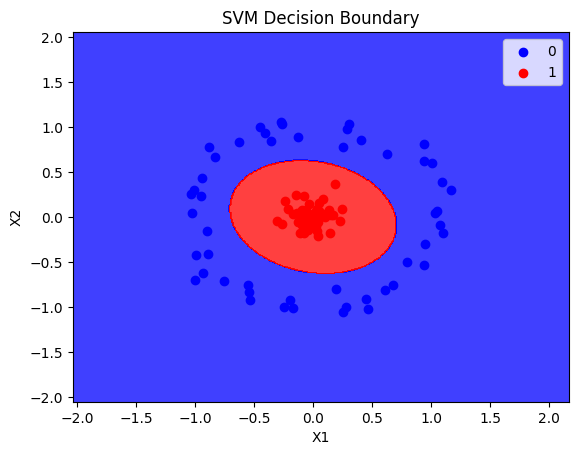

In [15]:
plot_decision_boundary(X, y, poly_classifier)

In [16]:
X

array([[-8.72253714e-03, -7.63076806e-02],
       [-1.08034832e-01, -1.81149085e-01],
       [ 1.24441923e-02, -1.21899865e-01],
       [ 1.03329501e+00,  4.31212640e-02],
       [-3.22950597e-02,  3.81890185e-02],
       [ 6.74141812e-01, -7.52638510e-01],
       [ 9.50594253e-01, -2.98733524e-01],
       [ 1.04716474e+00,  6.19150281e-02],
       [ 4.48336345e-01, -9.11388418e-01],
       [ 9.76243906e-02, -4.84234301e-03],
       [ 2.85564850e-02,  6.86888478e-02],
       [-4.45809279e-01,  9.96593043e-01],
       [-8.80401459e-01,  7.79257632e-01],
       [ 2.86414763e-01,  9.81786049e-01],
       [-9.46164692e-01,  2.34011993e-01],
       [ 2.44514459e-01,  8.59415158e-02],
       [-7.90148627e-02, -3.99689378e-02],
       [ 2.23878267e-01, -3.93531490e-02],
       [-7.63489240e-02,  2.35158255e-01],
       [-9.35815064e-01, -6.21970059e-01],
       [-6.27823292e-01,  8.34839823e-01],
       [-1.00507299e+00,  3.01904801e-01],
       [ 2.66347170e-02, -1.94887997e-02],
       [ 3.

In [17]:
np.exp(-(X**2)).sum(1)

array([1.99411798, 1.9561139 , 1.98509544, 1.34194112, 1.99750023,
       1.20231437, 1.31972118, 1.33019401, 1.25368311, 1.9904913 ,
       1.99447781, 1.19014856, 1.00550586, 1.30264222, 1.3552254 ,
       1.93460611, 1.99217986, 1.94956641, 1.94038961, 1.09574473,
       1.17234321, 1.2770404 , 1.9989111 , 1.95500624, 1.26835201,
       1.30582799, 1.08665362, 1.14409643, 1.24531908, 1.98540749,
       1.20873227, 1.83902259, 1.36430173, 1.98446679, 1.24118064,
       1.99941306, 1.33029056, 1.97610443, 1.30738976, 1.30614294,
       1.98631329, 1.30130632, 1.15916392, 1.25281646, 1.48443909,
       1.99041782, 1.16747874, 1.99555223, 1.94607081, 1.41882273,
       1.29174034, 1.16601269, 1.9996603 , 1.96332178, 0.97362169,
       1.99583677, 1.91457847, 1.95597053, 1.05628493, 1.91068716,
       1.99298181, 1.99550826, 1.9762304 , 1.38855415, 1.26837542,
       1.98257331, 1.9830584 , 1.17479734, 1.99265286, 1.25700958,
       1.29910175, 1.9717551 , 1.16428127, 1.28812964, 1.43708

In [18]:
X_new=np.exp(-(X**2))

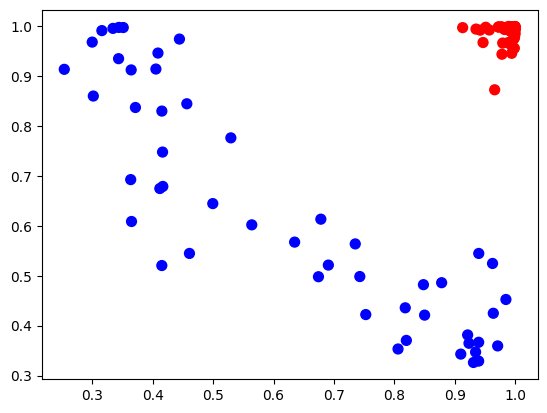

In [19]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')